In [1]:
%pylab inline
from threeML import *

Populating the interactive namespace from numpy and matplotlib



WARNING CppInterfaceNotAvailable: The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)


WARNING NaimaNotAvailable: The naima package is not available. Models that depend on it will not be available


WARNING GSLNotAvailable: The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.




Did you try to import pygsl in the build directory?

Well, that does not work out of the box. If you want to do that, please
use
      python setup.py build_ext -i
to add the necessary extension module in the local pygsl/ directory!

Please read the README first! Any further questions or missing information
please post to pygsl-discuss@lists.sourceforge.net!

Loading xspec models...


WARNING RuntimeWarning: The current value of the parameter switch was above the new maximum 1.0.


WARNING RuntimeWarning: The current value of the parameter specfile was above the new maximum 1.0.



done



WARNING UserWarning: ROOT minimizer not available



Configuration read from /Users/jburgess/.threeML/threeML_config.yml



WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incom

In [2]:
triggerName = 'bn090217206'
ra = 204.9
dec = -8.4

#Data are in the current directory

datadir = os.path.abspath('.')


#The .pha, .bak and .rsp files have been prepared with the Fermi
#official software. In the future it will be possible to create
#them directly from the plugin

#Create an instance of the GBM plugin for each detector
#Data files
obsSpectrum = os.path.join( datadir, "bn090217206_n6_srcspectra.pha{1}" )
bakSpectrum = os.path.join( datadir, "bn090217206_n6_bkgspectra.bak{1}" )
rspFile     = os.path.join( datadir, "bn090217206_n6_weightedrsp.rsp{1}" )

#Plugin instance
NaI6 = FermiGBMLike( "NaI6", obsSpectrum, bakSpectrum, rspFile )

#Choose energies to use (in this case, I exclude the energy
#range from 30 to 40 keV to avoid the k-edge, as well as anything above
#950 keV, where the calibration is uncertain)
NaI6.set_active_measurements( "10.0-30.0", "40.0-950.0" )

#Now repeat for the other GBM detectors

obsSpectrum = os.path.join( datadir, "bn090217206_n9_srcspectra.pha{1}" )
bakSpectrum = os.path.join( datadir, "bn090217206_n9_bkgspectra.bak{1}" )
rspFile     = os.path.join( datadir, "bn090217206_n9_weightedrsp.rsp{1}" )
#Plugin instance
NaI9 = FermiGBMLike( "NaI9", obsSpectrum, bakSpectrum, rspFile )
#Choose chanels to use
NaI9.set_active_measurements( "10.0-30.0", "40.0-950.0" )


obsSpectrum = os.path.join( datadir, "bn090217206_b1_srcspectra.pha{1}" )
bakSpectrum = os.path.join( datadir, "bn090217206_b1_bkgspectra.bak{1}" )
rspFile     = os.path.join( datadir, "bn090217206_b1_weightedrsp.rsp{1}" )
#Plugin instance
BGO1 = FermiGBMLike( "BGO1", obsSpectrum, bakSpectrum, rspFile )
#Choose chanels to use (in this case, from 200 keV to 10 MeV)
BGO1.set_active_measurements( "200-10000" )


data_list = DataList( NaI6, NaI9, BGO1 )

Now using 117 channels out of 128
Now using 115 channels out of 128
Now using 88 channels out of 128


In [3]:
#Let's use a Band model, a phenomenological model typically used for GRBs
bb = Blackbody()

pl  = Powerlaw()

comp_model = bb+pl


pl_co = Powerlaw() *Exponential_cutoff()




In [6]:
pl_co.K_2.free = True

In [7]:
GRB = PointSource( triggerName, ra, dec, spectral_shape=comp_model )

model = Model( GRB )

jl = JointLikelihood( model, data_list )

res = jl.fit()

Best fit values:



#,Name,Best fit value,Unit
0,bn090217206.spectrum.main.composite.K_1,(5.13 +/- 0.08)e-06,1 / (cm2 keV3 s)
1,bn090217206.spectrum.main.composite.kT_1,65.97 +/- 0.23,keV
2,bn090217206.spectrum.main.composite.K_2,150.05 +/- 0.25,1 / (cm2 keV s)
3,bn090217206.spectrum.main.composite.index_2,-6 +/- 11,



NOTE: errors on parameters are approximate. Use get_errors().

Nuisance parameters:



Name,Value,Unit
InterCalib_of_NaI6,1,
InterCalib_of_NaI9,1,
InterCalib_of_BGO1,1,



Correlation matrix:



1.00,-0.72,0.00,-0.01
-0.72,1.00,-0.00,0.00
0.00,-0.00,1.00,0.00
-0.01,0.00,0.00,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,2912.688734
NaI6,1031.535386
NaI9,1135.399418
BGO1,745.753930


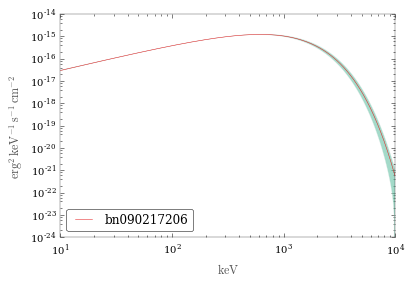

In [5]:
spec_plot_mle = SpectralPlotter(jl)
spec_plot_mle.plot_model(x_unit='keV',
                         y_unit='erg2/(cm2 keV s)',
                         ene_min=10.,
                         ene_max=1E4,
                         loc='lower left',
                         lw=.5,
                         ls='-')

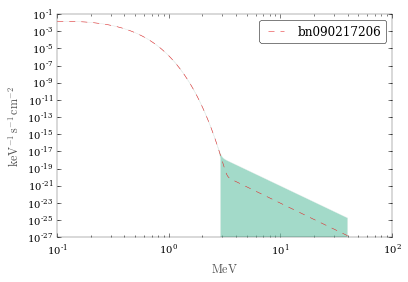

In [6]:

spec_plot_mle.plot_model(x_unit='MeV',
                         y_unit='1/(cm2 keV s)',
                         ene_min=1.E-1,
                         ene_max=4E1,
                         loc='upper right',
                         lw=.5,
                         ls='--')

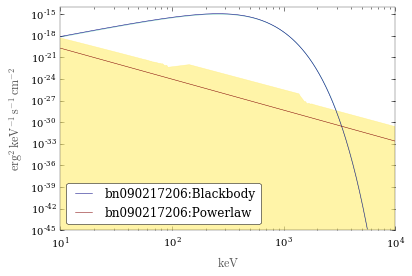

In [7]:
fit_cmap = plt.cm.jet
contour_cmap = plt.cm.Set3

spec_plot_mle.plot_components(x_unit='keV',
                         y_unit='erg2/(cm2 keV s)',
                         ene_min=10,
                         ene_max=1E4,
                         loc='lower left',
                         lw=.5,
                         ls='-',
                         fit_cmap=fit_cmap,
                         contour_cmap=contour_cmap,
                         contour_alpha=.6  )

In [12]:
comp_model.K_1.prior = Log_uniform_prior(lower_bound = 1E-7, upper_bound = 1E-5)
comp_model.K_2.prior = Log_uniform_prior(lower_bound =1E-1,upper_bound = 1E2)
comp_model.index_2.prior = Uniform_prior(lower_bound =-3,upper_bound = 3)
comp_model.kT_1.prior = Log_uniform_prior(lower_bound =1E1,upper_bound = 1E4)

bayes = BayesianAnalysis(model, data_list)

res= bayes.sample(100,100,1000)


Running burn-in of 100 samples...


Sampling...


Mean acceptance fraction: 0.58232


In [9]:
bayes_plot = SpectralPlotter(bayes)

In [10]:
bayes_plot.plot_model(x_unit='keV',
                         y_unit='erg2/(cm2 keV s)',
                         ene_min=10,
                         ene_max=1E4,
                         loc='lower left',
                         lw=.5,
                         ls='-',
                         fit_cmap=fit_cmap,
                         contour_cmap=contour_cmap,
                         contour_alpha=.6)

NameError: name 'fit_cmap' is not defined

(1e-23, 1e-14)

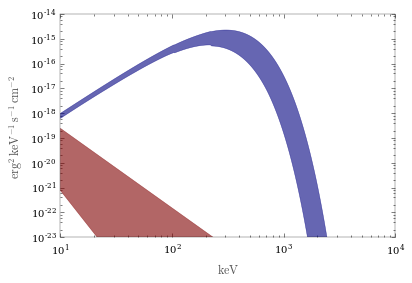

In [11]:
bayes_plot.plot_components(x_unit='keV',
                           y_unit='erg2/(cm2 keV s)',
                           ene_min=10,
                           ene_max=1E4,
                           lw=.5,
                           ls='-',
                           fit_cmap=fit_cmap,
                           contour_alpha=.6,
                           legend=False,
                           thin=10)
ylim(1E-23)

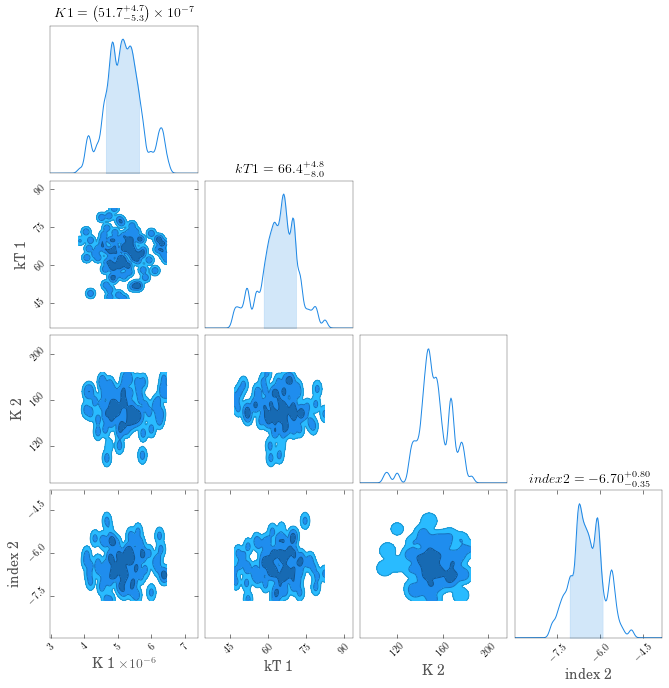

In [11]:
bayes.corner_plot_cc()